In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
zip_adres = "/content/drive/MyDrive/bitirme/autistic.zip"
!cp "{zip_adres}" .

In [ ]:
!unzip -q autistic.zip
!rm autistic.zip

In [ ]:
import os
import cv2 
from tqdm import tqdm 

folder_address = "autistic"
size = 64
channel = 3

data = []

for picture_name in tqdm(os.listdir(folder_address)):  
  
  picture_address = os.path.join(folder_address, picture_name)
  picture = cv2.imread(picture_address, cv2.IMREAD_COLOR)

  if picture is not None:
    picture = cv2.resize(picture, (size,size))
    data.append([picture])

100%|██████████| 1468/1468 [00:01<00:00, 972.05it/s]


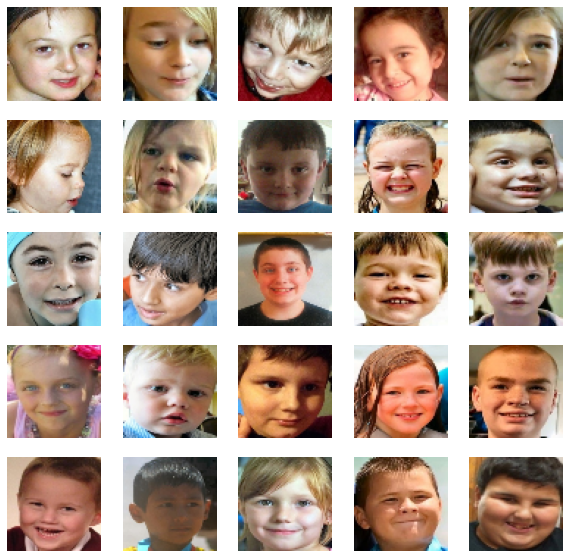

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))

for i in range(25):
  plt.subplot(5, 5, i+1)
  
  plt.imshow(cv2.cvtColor(data[i][0], cv2.COLOR_BGR2RGB))
  plt.axis("off")
plt.show()

In [ ]:
import numpy as np
data = np.array(data).reshape(-1, size, size, channel).astype('float32')
data = (data - 127.5) / 127.5

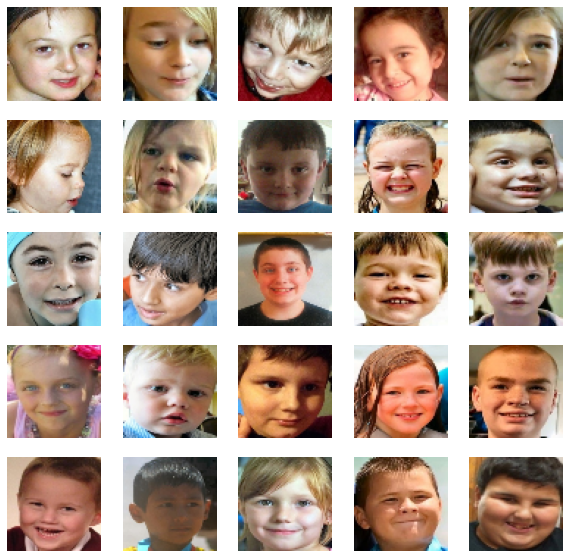

In [ ]:
fig = plt.figure(figsize=(10,10))

for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.imshow(cv2.cvtColor( ( (data[i] * 127.5) + 127.5 ).astype('uint8'), cv2.COLOR_BGR2RGB))
  plt.axis('off')

plt.show()

In [ ]:
import tensorflow as tf

BATCH_SIZE = 256

data = tf.data.Dataset.from_tensor_slices(data).batch(BATCH_SIZE)

In [ ]:
from tensorflow.keras import layers

NOISE_SIZE = 100 

initializer = tf.random_normal_initializer(0., 0.02)

gen_model = tf.keras.Sequential()

gen_model.add(layers.Dense(4*4*256, use_bias=False, input_shape=(NOISE_SIZE,)))
gen_model.add(layers.BatchNormalization())
gen_model.add(layers.LeakyReLU())
gen_model.add(layers.Reshape((4,4,256))) 

gen_model.add(layers.Conv2DTranspose(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', kernel_initializer=initializer, use_bias=False))
gen_model.add(layers.BatchNormalization())
gen_model.add(layers.LeakyReLU())

gen_model.add(layers.Conv2DTranspose(filters=128, kernel_size=(5,5), strides=(2,2), padding='same', kernel_initializer=initializer, use_bias=False))
gen_model.add(layers.BatchNormalization())
gen_model.add(layers.LeakyReLU())

gen_model.add(layers.Conv2DTranspose(filters=64, kernel_size=(5,5), strides=(2,2), padding='same', kernel_initializer=initializer, use_bias=False))
gen_model.add(layers.BatchNormalization())
gen_model.add(layers.LeakyReLU())

gen_model.add(layers.Conv2DTranspose(filters=32, kernel_size=(5,5), strides=(2,2), padding='same', kernel_initializer=initializer, use_bias=False))
gen_model.add(layers.BatchNormalization())
gen_model.add(layers.LeakyReLU())

gen_model.add(layers.Conv2DTranspose(channel, kernel_size=(5,5), strides=(2,2), padding='same', kernel_initializer=initializer, use_bias=False, activation='tanh'))


tf.Tensor(
[[-2.0769477   0.83650136 -2.0207548   1.584681   -2.205743    0.21860254
   0.13658762  0.8013231  -0.5855466  -0.13960676  0.4061761   0.3562921
  -0.01839535  1.186966   -0.34311634  1.2113795  -0.47395837 -1.0614593
  -0.01260981  0.28499153  0.3457224   0.03245673 -1.6139762  -0.05188068
  -0.34579086  1.192595   -0.81004524  0.09469806 -1.2683673   0.75668573
  -0.8957277   1.2802562  -0.5205817   0.19002457  0.45026556  0.40630484
  -1.0405627  -0.3805014   0.11361273  0.97065455  0.35047987 -0.19344488
   1.9398692   0.25250876 -3.3040314  -1.1998736   0.27130115  2.5100546
  -0.18492259  0.0616008   1.7122151   0.3160807  -0.18198805 -1.5076628
   0.6959995   0.6228297   0.04361476  1.3896691  -0.24506918  0.8451762
   0.52494985  0.09155897  1.8866206   1.2289366  -1.1893357   1.1100016
   0.87120664  0.73684114 -0.23749481  0.23203184 -0.82509834 -0.29911807
   0.18238899 -0.1155479  -0.42911926 -1.3412532   1.4338058   0.21743435
  -0.09977078 -0.38789657  0.4468

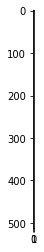

In [ ]:

noise = tf.random.normal([1,100]) 
print(noise)

test_picture = gen_model(noise, training=False)

plt.imshow(cv2.cvtColor((test_picture[0] * 127.5 + 127.5).numpy().reshape(512,2,3).astype('uint8'), cv2.COLOR_BGR2RGB))

In [ ]:
dis_model = tf.keras.Sequential()

dis_model.add(layers.Conv2D(32, (5,5), strides=(2,2), padding='same', input_shape=[size,size,channel], kernel_initializer=initializer, use_bias=False))
dis_model.add(layers.BatchNormalization())
dis_model.add(layers.LeakyReLU())
dis_model.add(layers.Dropout(0.2))

dis_model.add(layers.Conv2D(64, (5,5), strides=(2,2), padding='same', kernel_initializer=initializer, use_bias=False))
dis_model.add(layers.BatchNormalization())
dis_model.add(layers.LeakyReLU())
dis_model.add(layers.Dropout(0.2))

dis_model.add(layers.Conv2D(128, (5,5), strides=(2,2), padding='same', kernel_initializer=initializer, use_bias=False))
dis_model.add(layers.BatchNormalization())
dis_model.add(layers.LeakyReLU())
dis_model.add(layers.Dropout(0.2))

dis_model.add(layers.Conv2D(256, (5,5), strides=(2,2), padding='same', kernel_initializer=initializer, use_bias=False))
dis_model.add(layers.BatchNormalization())
dis_model.add(layers.LeakyReLU())
dis_model.add(layers.Dropout(0.2))

dis_model.add(layers.Flatten())

dis_model.add(layers.Dense(1))

In [ ]:
print(dis_model(test_picture))

tf.Tensor([[-3.077323e-05]], shape=(1, 1), dtype=float32)


In [ ]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def dis_loss(real_output, fake_output):
 
  real_loss = cross_entropy(tf.ones_like(real_output), real_output)  
  fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)

  total_loss = real_loss + fake_loss
  return total_loss

def gen_loss(fake_output):
  return cross_entropy(tf.ones_like(fake_output), fake_output)

In [ ]:
gen_opt = tf.keras.optimizers.Adam(learning_rate=2e-5)
dis_opt = tf.keras.optimizers.Adam(learning_rate=2e-5) 

In [ ]:
@tf.function
def train_step(images):
  
  noise = tf.random.normal([BATCH_SIZE, NOISE_SIZE])

  with tf.GradientTape() as gen_tape, tf.GradientTape() as dis_tape:

       generated_images = gen_model(noise, training=True) 

       real_output = dis_model(images, training=True)
       fake_output = dis_model(generated_images, training=True)

       gen_loss_val = gen_loss(fake_output)
       dis_loss_val = dis_loss(real_output, fake_output)

  grad_gen = gen_tape.gradient(gen_loss_val, gen_model.trainable_variables)
  grad_dis = dis_tape.gradient(dis_loss_val, dis_model.trainable_variables)

  gen_opt.apply_gradients(zip(grad_gen, gen_model.trainable_variables))
  dis_opt.apply_gradients(zip(grad_dis, dis_model.trainable_variables))

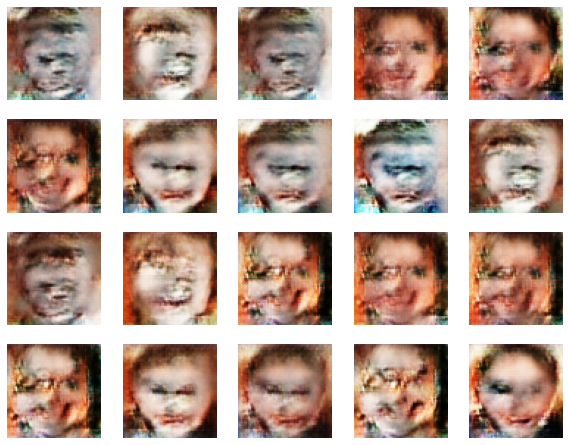

In [ ]:
from IPython import display

EPOCHS = 5000

seed = tf.random.normal([20, NOISE_SIZE]) 

for epoch in range(EPOCHS):

  for image_batch in data:

    train_step(image_batch) 

  predictions = gen_model(seed, training=False) 

  fig = plt.figure(figsize=(10,10))

  for i in range(predictions.shape[0]):
    plt.subplot(5, 5, i+1)
    plt.imshow(cv2.cvtColor((predictions[i] * 127.5 + 127.5).numpy().reshape(size,size,channel).astype('uint8'), cv2.COLOR_BGR2RGB))
    plt.axis('off')
  plt.show()

  data.shuffle(10000)
 
  display.clear_output(wait=True)